#  K-nearest neighbors regression model for Automobile Dataset

##  1.a) Implementing K neareast neighbors and reporting Validation set RMSE
#### Importing important libraries and getting the Dataset

In [1]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

na_values = ['?', 'NAN', 'NA']
data_frame =  pd.read_csv('imports-85.data', sep=",", na_values=na_values)


#### Inspecting  the data frame variable to get idea of shape and type of data

In [2]:
data_frame.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
data_frame.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [4]:
data_frame.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Handling Null Values
Finding out how many variables have null values and their count. Then handling them by either dropping or replacing with mean.

In [5]:
null_values_mask = data_frame.isnull()
null_values_mask.sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
data_frame.fillna(data_frame.mean(), inplace= True)


C:\Users\manjy\AppData\Local\Temp/ipykernel_932/2607369737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_frame.fillna(data_frame.mean(), inplace= True)


In [7]:
null_values_mask = data_frame.isnull()
null_values_mask.sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Num-of-doors is not an int, so it wasn't replaced with int.<br/>
Finding it's index and manually adding index with highest frequency.

In [8]:
data_frame.loc[pd.isna(data_frame["num-of-doors"]), :].index


Int64Index([27, 63], dtype='int64')

In [9]:
data_frame["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [10]:
data_frame.fillna('four', inplace= True)

Replacing numbers which are written as strings to actual number

In [11]:
data_frame['num-of-doors'].replace('four', 4,inplace=True)
data_frame['num-of-doors'].replace('two', 2,inplace=True)
data_frame['num-of-cylinders'].replace('eight', 8, inplace=True)
data_frame['num-of-cylinders'].replace('five', 5, inplace=True)
data_frame['num-of-cylinders'].replace('four', 4, inplace=True)
data_frame['num-of-cylinders'].replace('six', 6, inplace=True)
data_frame['num-of-cylinders'].replace('three', 3, inplace=True)
data_frame['num-of-cylinders'].replace('twelve', 12, inplace=True)
data_frame['num-of-cylinders'].replace('two', 2, inplace=True)


In [12]:
data_frame.corr()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.663595,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.357192,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.108081,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
num-of-doors,-0.663595,-0.357192,1.000000,0.439635,0.385675,0.197735,0.540286,0.190720,-0.019503,0.013919,0.108510,-0.006892,0.171797,-0.128184,-0.240298,-0.014271,-0.037452,0.041945
wheel-base,-0.531954,-0.056518,0.439635,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.385675,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.197735,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.540286,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.190720,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
num-of-cylinders,-0.113129,0.108081,-0.019503,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231439,0.008151,-0.020002,0.691208,-0.124358,-0.445837,-0.466666,0.687770
engine-size,-0.105790,0.110997,0.013919,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752


Dropping few variables which are categorical in nature

In [13]:
# drop_list = ["symboling","num-of-doors","stroke","compression-ratio","body-style","drive-wheels","engine-location","engine-type","fuel-system"]
# data_frame= data_frame.drop(drop_list,axis=1)

Extracting X and Y. Y will be the last column of dataframe

In [14]:
def get_features_and_output_vectors(data_frame):
    Y = data_frame.iloc[:,-1:]
    X = data_frame.iloc[:,:-1]
    return (X, Y)

# pd.get_dummies will give
def replace_categorical_variable_with_distinct_rows(data_frame):
    return pd.get_dummies(data_frame)


def get_train_validation_set(X, Y, split_ratio=0.85):
    
    msk = np.random.rand(len(X)) < split_ratio
    X_train = X[msk]
    X_test = X[~msk]
    Y_train = Y[msk]
    Y_test = Y[~msk]
    return X_train, Y_train, X_test, Y_test

#### Implementing KNN using Squared Eucledian Distance

Squared Eucledian Distance Formula:
$$ d\left( x,y\right)   ={\sum _{i=1}^{n}  \left( y_{i}-x_{i}\right)^2 }  $$
 

In [15]:
def KNN(X_train, X_test, Y_train, Y_test, x,k=7):
    distance = np.sum((X_train - x)**2,axis=1)
    
    near_y = Y_train.iloc[distance.argsort()]
    KDist = near_y[:k]
    summ = np.sum(KDist)/k
    return summ

def get_KNN_error(X_train, X_test, Y_train, Y_test, k):
    error = 0
    for i in range(len(X_test)):
        KNN_pred = KNN(X_train, X_test, Y_train, Y_test, X_test.iloc[i], k)
        error += (KNN_pred - Y_test.iloc[i])**2
    
    error /= len(X_test)
    return sqrt(error) 


In [16]:
def scale_features(X_train, X_test):
    mean_x = X_train.mean()
    std_x = X_train.std()

    X_train_s = (X_train - mean_x)/std_x
    X_test_s = (X_test - mean_x)/std_x
    return X_train_s, X_test_s


def KNN_scaled(X_train_s, x,Y_train, Y_test,k=7):
    distance = np.sum((X_train_s - x)**2,axis=1)
    
    near_y = Y_train.iloc[distance.argsort()]
    KDist = near_y[:k]
    summ = np.sum(KDist)/k
    return summ

def get_scaled_KNN_error(X_train_s, X_test_s, Y_train, Y_test, k):
    error = 0
    for i in range(len(X_test_s)):
        KNN_pred = KNN_scaled(X_train_s, X_test_s.iloc[i],Y_train, Y_test, k)
        error += (KNN_pred - Y_test.iloc[i])**2

    error /= len(X_test_s)
    return sqrt(error)

In [17]:
X, Y = get_features_and_output_vectors(data_frame)
X = replace_categorical_variable_with_distinct_rows(X)

X_train, Y_train, X_test, Y_test = get_train_validation_set(X, Y)

rmse = get_KNN_error(X_train, X_test,Y_train, Y_test,k=7)
print(f"RMSE Error Obtained on Test Set for k=7 is {rmse}")

RMSE Error Obtained on Test Set for k=7 is 4381.283460041128


#### Thus, reporting validation set error is around 5000. 

# 1.b) Finding Optimal Value of K using Cross Validation
## K Fold Implementation

#### Performing K Fold validation to find best value for K

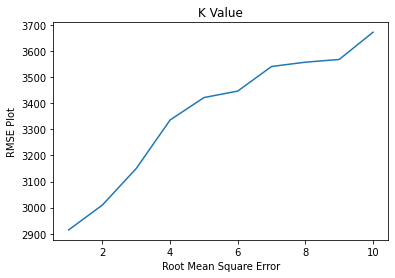

In [18]:
def K_fold(data_frame,folds=5):
    data_frame = data_frame.sample(frac=1)

    upper_bound_k = 10
    error_val = np.zeros((upper_bound_k))
    for i in range(folds):
        mask = np.zeros((len(data_frame)), dtype=bool)
        num_of_tests = int(len(data_frame)/folds)
        if i == folds-1:
            mask[i*num_of_tests:] = True
        
        else:
            
            mask[i*num_of_tests: ((i+1)*num_of_tests)] = True
        
        
        X, Y = get_features_and_output_vectors(data_frame)
        X = replace_categorical_variable_with_distinct_rows(X)

        X_train, Y_train, X_test, Y_test = get_train_validation_set(X, Y)
        
        k_vals = range(1,upper_bound_k+1)

        for k_val in k_vals:
            err = get_KNN_error(X_train, X_test, Y_train, Y_test,k_val)
            error_val[k_val-1] += err
    return list(k_vals), error_val/(folds)
       
k_vals, error_list = K_fold(data_frame)
plt.plot(k_vals, error_list)
plt.title("K Value")
plt.xlabel("Root Mean Square Error")
plt.ylabel("RMSE Plot")
plt.show()

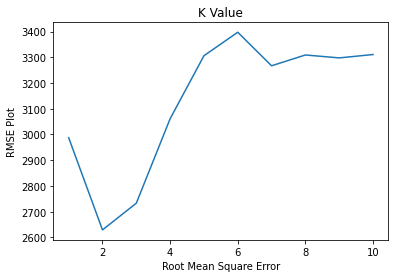

In [19]:
def K_fold_scaled(data_frame,folds=5):
    data_frame = data_frame.sample(frac=1)

    upper_bound_k = 10
    error_val = np.zeros((upper_bound_k))
    for i in range(folds):
        mask = np.zeros((len(data_frame)), dtype=bool)
        num_of_tests = int(len(data_frame)/folds)
        if i == folds-1:
            mask[i*num_of_tests:] = True
        
        else:
            mask[i*num_of_tests: ((i+1)*num_of_tests)] = True
        
        
        X, Y = get_features_and_output_vectors(data_frame)
        X = replace_categorical_variable_with_distinct_rows(X)
        X_train, Y_train, X_test, Y_test = get_train_validation_set(X, Y)
        X_train_s, X_test_s = scale_features(X_train, X_test)
        
        k_vals = range(1,upper_bound_k+1)

        for k_val in k_vals:
            err = get_scaled_KNN_error(X_train_s, X_test_s,Y_train, Y_test, k_val)
            error_val[k_val-1] += err
    return list(k_vals), error_val/(folds)
       
k_vals, error_list = K_fold_scaled(data_frame)
plt.plot(k_vals, error_list)
plt.title("K Value")
plt.xlabel("Root Mean Square Error")
plt.ylabel("RMSE Plot")
plt.show()

## Conclusion
Optimal value for K when Feature Scaling is performed is 2. RMSE value obtained is around 2600 <br/>
Optimal value for K when no Feature Scaling is performed is 1. RMSE value obtained is around 3000 <br/>
Also, feature Scaling performs better than snippet without feature scaling

# Decision Tree Model for Census Income Dataset

## 2.a) Implementing Decision tree using information gain and reporting Validation set accuracy

#### Importing important libraries and getting the Dataset

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

na=[' ?']
# column_names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
data_frame=pd.read_csv('adult.data',na_values=na,index_col=False)

#### Inspecting  the data frame variable to get idea of shape and type of data

In [21]:
data_frame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
data_frame.shape

(32561, 15)

In [23]:
data_frame.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [24]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
data_frame.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Cleaning Data
#### Handling Null Values
Finding out how many variables have null values and their count. Then handling them by either dropping or replacing with mean or most frequent element.

In [26]:
data_frame.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [27]:
data_frame.fillna(data_frame.mode().loc[0], inplace= True)
data_frame.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

#### Replacing categorical data with numbers for Decision tree to be able to handle it

In [28]:
data_frame['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [29]:
data_frame['salary'].replace(' <=50K',0,inplace=True)
data_frame['salary'].replace(' <=50K.',0,inplace=True)
data_frame['salary'].replace(' >50K',+1,inplace=True)
data_frame['salary'].replace(' >50K.',+1,inplace=True)

In [30]:
data_frame['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [31]:
data_frame['workclass'].replace(' State-gov',0,inplace=True)
data_frame['workclass'].replace(' Self-emp-not-inc',1,inplace=True)
data_frame['workclass'].replace(' Private',2,inplace=True)
data_frame['workclass'].replace(' Federal-gov',3,inplace=True)
data_frame['workclass'].replace(' Local-gov',4,inplace=True)
data_frame['workclass'].replace(' Self-emp-inc',5,inplace=True)
data_frame['workclass'].replace(' Without-pay',6,inplace=True)
data_frame['workclass'].replace(' Never-worked',7,inplace=True)

In [32]:
data_frame['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [33]:
data_frame['marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
data_frame['marital-status'].replace(' Married-AF-spouse', 'Married',inplace=True)
data_frame['marital-status'].replace(' Married-civ-spouse', 'Married',inplace=True)
data_frame['marital-status'].replace(' Married-spouse-absent', 'NotMarried',inplace=True)
data_frame['marital-status'].replace(' Separated', 'Separated',inplace=True)
data_frame['marital-status'].replace(' Divorced', 'Separated',inplace=True)
data_frame['marital-status'].replace(' Widowed', 'Widowed',inplace=True)

In [34]:
data_frame['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [35]:
data_frame['race'].replace(' White',0,inplace=True)
data_frame['race'].replace(' Black',1,inplace=True)
data_frame['race'].replace(' Asian-Pac-Islander',2,inplace=True)
data_frame['race'].replace(' Asian-Pac-Islander',2,inplace=True)
data_frame['race'].replace(' Amer-Indian-Eskimo',3,inplace=True)
data_frame['race'].replace(' Other',4,inplace=True)

In [36]:
data_frame.sex.unique()

array([' Male', ' Female'], dtype=object)

In [37]:
data_frame['sex'].replace(' Male',0,inplace=True)
data_frame['sex'].replace(' Female',1,inplace=True)


In [38]:
data_frame['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [39]:
data_frame['relationship'].replace(' Not-in-family',0,inplace=True)
data_frame['relationship'].replace(' Husband',1,inplace=True)
data_frame['relationship'].replace(' Wife',2,inplace=True)
data_frame['relationship'].replace(' Own-child',3,inplace=True)
data_frame['relationship'].replace(' Unmarried',4,inplace=True)
data_frame['relationship'].replace(' Other-relative',5,inplace=True)


## Implementation
Implementing Decision Tree with Information Gain formula



In [40]:
class Node:
    # A node stores its own depth (root = depth 0), its decision stump, its parent and child information
    # Leaf nodes also store a constant label that is assigned to every data point that reaches that leaf
    def __init__( self, depth = 0, stump = (0,0), parent = None ):
        self.depth = depth
        self.stump = stump
        self.parent = parent
        self.left = None
        self.right = None
        self.isLeaf = True
        self.label = 0
        
    def predict( self, data ):

        if self.isLeaf:
            return self.label

        else:

            # Case for if variable is object
            if not isinstance(self.stump[1],(float,int)):
                if data[self.stump[0]] != self.stump[1]:
                    return self.right.predict( data )
                else:
                    return self.left.predict( data )
                
                
            if data[self.stump[0]] > self.stump[1]:
                return self.right.predict( data )
            else:
                return self.left.predict( data )
            

    def getEntropy(self, data):
        _, uniqueClassesCounts = np.unique(data[:, -1], return_counts = True)
        probabilities = uniqueClassesCounts / uniqueClassesCounts.sum()
        return sum(probabilities * -np.log2(probabilities))

    def getOverallEntropy(self, dataBelow, dataAbove):
        pDataBelow = len(dataBelow) / (len(dataBelow) + len(dataAbove))
        pDataAbove = len(dataAbove) / (len(dataBelow) + len(dataAbove))

        data_below_IG = pDataBelow * self.getEntropy(dataBelow)
        data_above_IG = pDataAbove * self.getEntropy(dataAbove)
        return data_below_IG + data_above_IG
      
    def getPossibleSplits(self,data):
        possibleSplits = {}
        columns = data.shape[1]
        columnsIndices = list(range(columns - 2))

        for column in columnsIndices:
            values = data[:, column]

            if data[:,column].dtype == "int64":
                uniqueValues = np.unique(values)
                if len(uniqueValues) == 1:
                    possibleSplits[column] = uniqueValues
                else:
                    possibleSplits[column] = []
                    for i in range(len(uniqueValues)):
                        if i != 0:
                            currentValue = uniqueValues[i]
                            previousValue = uniqueValues[i - 1]
                            possibleSplits[column].append((currentValue + previousValue) / 2)
            else:
                uniqueValues = np.unique(values)
                if len(uniqueValues) == 1:
                    possibleSplits[column] = uniqueValues
                else:
                    possibleSplits[column] = []
                    for i in range(len(uniqueValues)):
                        possibleSplits[column].append(uniqueValues[i])

        return possibleSplits
     
    
    def splitData(self,data, splitColumn, splitValue):
        splitColumnValues = data[:, splitColumn]
        if data[:, splitColumn].dtype == "int64":
            return data[splitColumnValues <= splitValue], data[splitColumnValues > splitValue]
        
        else:
            return data[splitColumnValues == splitValue], data[splitColumnValues != splitValue]
    
    def getStump( self, data):
        
        # For each of the features in the data
        overallEntropy = 100000
        bestSplitColumn = 0
        bestSplitValue = 0
        
        possibleSplits = self.getPossibleSplits(data)
        for splitColumn in possibleSplits:
            for splitValue in possibleSplits[splitColumn]:
                dataBelow, dataAbove = self.splitData(data, splitColumn, splitValue)
                currentOverallEntropy = self.getOverallEntropy(dataBelow, dataAbove)
                if currentOverallEntropy <= overallEntropy:
                    overallEntropy = currentOverallEntropy
                    bestSplitColumn = splitColumn
                    bestSplitValue = splitValue
                    
        return (bestSplitColumn, bestSplitValue) #bestFeat is the best feature bestThresh is the > value(decision boundary)
      
    def checkPurity(self,data):
        if len(np.unique(data[:, -1])) == 1:
            return True
        else:
            return False
    
    def classifyData(self,data):
        self.isLeaf = True
        uniqueClasses, uniqueClassesCounts = np.unique(data[:, -1], return_counts = True)
        self.label=uniqueClasses[uniqueClassesCounts.argmax()]
        return uniqueClasses[uniqueClassesCounts.argmax()]

    def train( self, data, maxLeafSize, maxDepth ):
        # If too few data points are present, or else if this node is too deep in the tree, make this a leaf
        X = data[:,:-1]
        y = data[:,-1]
        if y.size < maxLeafSize or self.depth >= maxDepth:

            self.classifyData(data)
            
        elif self.checkPurity(data):
            self.classifyData(data)
        else:
            # This node will be split and hence it is not a leaf
            self.isLeaf = False
            # Get the best possible decision stump
            self.stump = self.getStump( data )
            self.left = Node( depth = self.depth + 1, parent = self )
            self.right = Node( depth = self.depth + 1, parent = self )
            # Find which points go to my left child and which go to my right child
            
            dataBelow, dataAbove = self.splitData(data, self.stump[0], self.stump[1])
            if len(dataBelow) == 0 or len(dataAbove) == 0:
                return self.classifyData(data)
            
            self.left.train( dataBelow, maxLeafSize, maxDepth )
            self.right.train( dataAbove, maxLeafSize, maxDepth )

class Tree:
    def __init__( self, maxLeafSize = 10, maxDepth = 3 ):
        self.root = Node()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, xt ):
        return self.root.predict( np.array( xt ) )
    
    def train( self, X, y ):
        data=np.concatenate((X,y),axis=1)
        self.root.train( data, self.maxLeafSize, self.maxDepth )


In [41]:
def getAccuracy(DT, X_list, Y_list):
    y_pred_train_list=[]
    for i in range(len(X_list)):
        y_pred=DT.predict(X_list[i])
        y_pred_train_list.append(y_pred)

    flat_arr = np. reshape(Y_list, -1, order='F')
    numerator=sum(abs(y_pred_train_list - flat_arr))
    denominator = len(y_pred_train_list)
    return (1- numerator/denominator)

In [42]:
def get_train_validation_set(X, Y, split_ratio=0.8):
    
    msk = np.random.rand(len(X)) < split_ratio
    X_train = X[msk]
    X_test = X[~msk]
    Y_train = Y[msk]
    Y_test = Y[~msk]
    return X_train, Y_train, X_test, Y_test

In [43]:
def get_features_and_output_vectors(data_frame):
    l1 = ['age',"workclass","education-num","race",'sex','hours-per-week',"relationship",'capital-gain','capital-loss',"fnlwgt"]
    X=data_frame[l1].values
    X[:,0]
    y=data_frame['salary'].values
    y= y.reshape(-1,1)
    
    return X,y

In [44]:
X, y = get_features_and_output_vectors(data_frame)
x_train, y_train, x_val, y_val = get_train_validation_set(X,y)

In [45]:
# data=np.concatenate((x_train,y_train),axis=1)
DT = Tree( maxLeafSize = 5, maxDepth = 15)
DT.train( x_train, y_train )

In [46]:


trainingAccuracy = getAccuracy(DT,x_train, y_train)
testAccuracy = getAccuracy(DT, x_val, y_val)

print(f"Training Accuracy is :{trainingAccuracy}")
print(f"Test Accuracy is :{testAccuracy}")

Training Accuracy is :0.8833288631748343
Test Accuracy is :0.847106159083875


## 2.b: Using Cross Validation to optimize tree hyperparameter

In [47]:
def K_Fold(data_frame, folds=5):
    data_frame = data_frame.sample(frac=1)

    upper_bound_max_depth = 15
    train_accuracy_val = np.zeros((upper_bound_max_depth))
    test_accuracy_val = np.zeros((upper_bound_max_depth))
    for i in range(folds):
        mask = np.zeros((len(data_frame)), dtype=bool)
        num_of_tests = int(len(data_frame)/folds)
        if i == folds-1:
            mask[i*num_of_tests:] = True
        
        else:
            mask[i*num_of_tests: ((i+1)*num_of_tests)] = True
        
        
        X, Y = get_features_and_output_vectors(data_frame)
        
        X_train, Y_train, X_test, Y_test = get_train_validation_set(X, Y)
                
        max_depths = range(1,upper_bound_max_depth+1)

        for depth in max_depths:
            DT = Tree( maxLeafSize = 5, maxDepth = depth)
            DT.train( X_train, Y_train )
            
            train_accuracy_val[depth-1] += getAccuracy(DT, X_train, Y_train)
            test_accuracy_val[depth-1] += getAccuracy(DT, X_test, Y_test)
            
    return list(max_depths), train_accuracy_val/folds, test_accuracy_val/folds
       


In [48]:
# This line of code takes around 4 5 mins to finish

k_vals, train_error, test_error = K_Fold(data_frame)

#### Plotting Accuracy for visualization

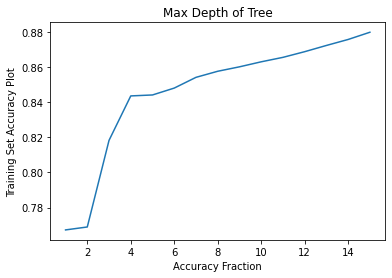

In [49]:
plt.plot(k_vals, train_error)
plt.title("Max Depth of Tree")
plt.xlabel("Accuracy Fraction")
plt.ylabel("Training Set Accuracy Plot")
plt.show()

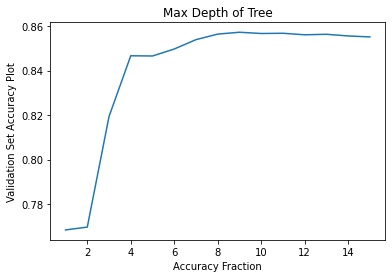

In [50]:
plt.plot(k_vals, test_error)
plt.title("Max Depth of Tree")
plt.xlabel("Accuracy Fraction")
plt.ylabel("Validation Set Accuracy Plot")
plt.show()

### Conclusion
We can see that our training accuracy keeps increasing on increasing the depth of decision tree. <br/>
But its not true for validation set accuracy. For validation set, accuracy peaks at depth = 8, and then plateaus, and falls